# Gas Prices

In [83]:
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta, date
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
mpl.rcParams['savefig.dpi'] = 144
mpl.rcParams['figure.figsize'] = (5, 5)

## Connect to Database

In [3]:
%load_ext sql

/opt/conda/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [4]:
dbuser, dbpass, dbname, dbhost = "gasprices", "gasprices", "gasprices", "localhost"

In [5]:
%%sql postgresql://$dbuser:$dbpass@$dbhost/$dbname
SELECT version()

1 rows affected.


version
"PostgreSQL 9.3.16 on x86_64-unknown-linux-gnu, compiled by gcc (Ubuntu 4.8.4-2ubuntu1~14.04.3) 4.8.4, 64-bit"


## Load Data into Database

In [4]:
!mkdir -p data

In [5]:
!if [ ! -f data/history.dump.gz ]; then (cd data; curl https://creativecommons.tankerkoenig.de/history/history.dump.gz); fi

In [6]:
!if [ ! -f data/history.dump.1.gz ]; then (cd data; curl https://creativecommons.tankerkoenig.de/history/history.dump.1.gz); fi

In [58]:
!(cd data; for f in *.gz; do if [ ! -f ${f%.gz}.sql ]; then gunzip -c $f > ${f%.gz}.sql; fi; done)

In [79]:
%sql DROP TABLE IF EXISTS gas_station
%sql DROP TABLE IF EXISTS gas_station_information_history

Done.
Done.


[]

In [80]:
#import all files: !export PGPASSWORD={dbpass}; for f in data/*.sql; do psql -U {dbuser} -d {dbname} -h {dbhost} < $$f; done
!export PGPASSWORD={dbpass}; psql -U {dbuser} -d {dbname} -h {dbhost} < data/history.dump.sql; done

SET
SET
SET
SET
SET
SET
ERROR:  unrecognized configuration parameter "row_security"
SET
SET
SET
CREATE TABLE
CREATE TABLE
CREATE SEQUENCE
ALTER SEQUENCE
ALTER TABLE
  setval  
----------
 38796173
(1 row)

ALTER TABLE
CREATE INDEX
CREATE INDEX
CREATE INDEX
CREATE INDEX
CREATE INDEX
CREATE INDEX


## Check Import

In [6]:
%sql SELECT * FROM information_schema.tables WHERE table_type = 'BASE TABLE' AND table_schema = 'public';

2 rows affected.


table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
gasprices,public,gas_station,BASE TABLE,None,None,None,None,None,YES,NO,None
gasprices,public,gas_station_information_history,BASE TABLE,None,None,None,None,None,YES,NO,None


In [7]:
%sql SELECT COUNT(*) FROM gas_station;

1 rows affected.


count
14814


In [8]:
%sql SELECT * FROM information_schema.columns WHERE table_name = 'gas_station'

15 rows affected.


table_catalog,table_schema,table_name,column_name,ordinal_position,column_default,is_nullable,data_type,character_maximum_length,character_octet_length,numeric_precision,numeric_precision_radix,numeric_scale,datetime_precision,interval_type,interval_precision,character_set_catalog,character_set_schema,character_set_name,collation_catalog,collation_schema,collation_name,domain_catalog,domain_schema,domain_name,udt_catalog,udt_schema,udt_name,scope_catalog,scope_schema,scope_name,maximum_cardinality,dtd_identifier,is_self_referencing,is_identity,identity_generation,identity_start,identity_increment,identity_maximum,identity_minimum,identity_cycle,is_generated,generation_expression,is_updatable
gasprices,public,gas_station,id,1,None,NO,uuid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,uuid,None,None,None,None,1,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station,version,2,None,NO,character varying,10,40,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,varchar,None,None,None,None,2,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station,version_time,3,None,NO,timestamp without time zone,None,None,None,None,None,6,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,timestamp,None,None,None,None,3,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station,name,4,None,NO,text,None,1073741824,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,text,None,None,None,None,4,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station,brand,5,None,YES,text,None,1073741824,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,text,None,None,None,None,5,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station,street,6,None,YES,text,None,1073741824,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,text,None,None,None,None,6,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station,house_number,7,None,YES,text,None,1073741824,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,text,None,None,None,None,7,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station,post_code,8,None,YES,text,None,1073741824,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,text,None,None,None,None,8,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station,place,9,None,YES,text,None,1073741824,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,text,None,None,None,None,9,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station,public_holiday_identifier,10,None,YES,text,None,1073741824,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,text,None,None,None,None,10,NO,NO,None,None,None,None,None,None,NEVER,None,YES


In [9]:
%sql SELECT COUNT(*) FROM gas_station_information_history;

1 rows affected.


count
38813736


In [10]:
%sql SELECT * FROM information_schema.columns WHERE table_name = 'gas_station_information_history'

7 rows affected.


table_catalog,table_schema,table_name,column_name,ordinal_position,column_default,is_nullable,data_type,character_maximum_length,character_octet_length,numeric_precision,numeric_precision_radix,numeric_scale,datetime_precision,interval_type,interval_precision,character_set_catalog,character_set_schema,character_set_name,collation_catalog,collation_schema,collation_name,domain_catalog,domain_schema,domain_name,udt_catalog,udt_schema,udt_name,scope_catalog,scope_schema,scope_name,maximum_cardinality,dtd_identifier,is_self_referencing,is_identity,identity_generation,identity_start,identity_increment,identity_maximum,identity_minimum,identity_cycle,is_generated,generation_expression,is_updatable
gasprices,public,gas_station_information_history,id,1,nextval('gas_station_information_history_id_seq'::regclass),NO,integer,None,None,32,2,0,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,int4,None,None,None,None,1,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station_information_history,stid,2,None,NO,uuid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,uuid,None,None,None,None,2,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station_information_history,e5,3,None,YES,smallint,None,None,16,2,0,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,int2,None,None,None,None,3,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station_information_history,e10,4,None,YES,smallint,None,None,16,2,0,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,int2,None,None,None,None,4,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station_information_history,diesel,5,None,YES,smallint,None,None,16,2,0,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,int2,None,None,None,None,5,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station_information_history,date,6,None,NO,timestamp with time zone,None,None,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,timestamptz,None,None,None,None,6,NO,NO,None,None,None,None,None,None,NEVER,None,YES
gasprices,public,gas_station_information_history,changed,7,None,YES,smallint,None,None,16,2,0,None,None,None,None,None,None,None,None,None,None,None,None,gasprices,pg_catalog,int2,None,None,None,None,7,NO,NO,None,None,None,None,None,None,NEVER,None,YES


## First Check of Data

In [11]:
gasstations_result = %sql SELECT * FROM gas_station

14814 rows affected.


In [12]:
gasstations = gasstations_result.DataFrame()

In [13]:
gasstations.head()

,id,version,version_time,name,brand,street,house_number,post_code,place,public_holiday_identifier,lat,lng,updated,updated2,open_ts
0,005056ba-7cb6-1ed2-bceb-c6e8560e6d53,1075,2017-03-06 22:50:12.499,star Tankstelle,STAR,Gewerbering,1,1609,Gröditz,None,51.404960,13.436570,2017-03-07 02:16:31+00:00,2017-03-06 22:03:31+00:00,1
1,00569e4a-3ee2-4bd9-b5be-b71876e4efa8,29,2017-03-06 14:05:04.373,AVIA KESLAR,AVIA,Hauptstraße,25,87637,Seeg,None,47.654210,10.608781,2017-03-07 02:16:31+00:00,2017-03-06 22:31:31+00:00,1
2,03f7cec3-9b56-48f6-9ca1-e7f6dd395e15,1,2015-04-01 13:23:05.000,TOTAL WALDESCH,TOTAL,RHENSER STR.,4,56323,WALDESCH,None,50.279064,7.548622,2017-03-07 02:16:31+00:00,2017-03-06 20:57:31+00:00,1
3,06abdb4c-f337-499a-84aa-35000483acc0,22,2017-03-06 12:00:04.000,Esso Tankstelle,ESSO,HAUPTSTR. 79,,56459,KOELBINGEN,None,50.548390,7.921952,2017-03-07 02:16:31+00:00,2017-03-06 22:10:31+00:00,-1488862800
4,0b3bfbe1-ff59-4329-8917-db92e0489b2c,4,2016-03-28 19:24:37.000,Aral Tankstelle,ARAL,Im Wingert,20,53115,Bonn,None,50.718098,7.091064,2017-03-07 02:16:31+00:00,2017-03-06 21:01:31+00:00,-1488862800


In [14]:
3 * len(gasstations) * 15 * 24 * 365 # potential data points per year

5839678800

In [15]:
count = %sql SELECT COUNT(*) FROM gas_station_information_history
1.0 * count[0][0] / (datetime.now() - datetime(2016, 5, 2)).days / len(gasstations) # average price changes per day

1 rows affected.


8.397664371540435

In [16]:
firstuuid = gasstations[:1]["id"].max()
firsthistoryresult = %sql SELECT * FROM gas_station_information_history WHERE stid = '$firstuuid'

2278 rows affected.


In [17]:
firsthistory = firsthistoryresult.DataFrame()

In [18]:
firsthistory.head()

,id,stid,e5,e10,diesel,date,changed
0,20321112,005056ba-7cb6-1ed2-bceb-c6e8560e6d53,1289,1269,1089,2016-10-18 14:49:31+00:00,21
1,20349330,005056ba-7cb6-1ed2-bceb-c6e8560e6d53,1369,1349,1169,2016-10-18 21:03:31+00:00,21
2,20377115,005056ba-7cb6-1ed2-bceb-c6e8560e6d53,1349,1329,1159,2016-10-19 06:37:31+00:00,21
3,20397701,005056ba-7cb6-1ed2-bceb-c6e8560e6d53,1329,1309,1129,2016-10-19 09:17:31+00:00,21
4,20414024,005056ba-7cb6-1ed2-bceb-c6e8560e6d53,1349,1329,1149,2016-10-19 10:33:31+00:00,21


# First Charts

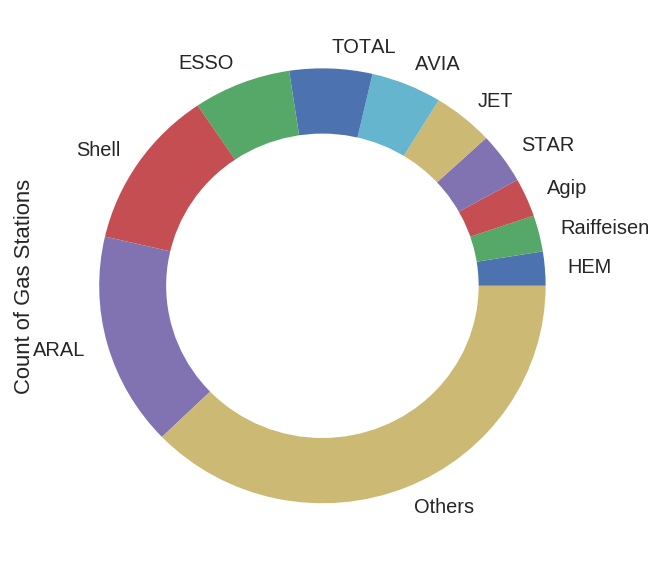

In [66]:
brands = gasstations.groupby("brand")["brand"].count().rename("Count of Gas Stations")
commonbrands = brands[brands >= brands.sum()/40]
commonbrands.set_value("Others", brands.sum() - commonbrands.sum())
ax = commonbrands.sort_values().plot(kind="pie")
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0, 0), 0.7, fc="white"))

In [88]:
def plot_prices(stid, start=datetime.now() - timedelta(days=9), end=datetime.now(), nightstart=22, nightend=6):
    #find information about the gas station at the database
    station_information = %sql SELECT * FROM gas_station WHERE id = '$stid'
    station = station_information.DataFrame()[:1]
    
    #find price history of that gas station
    history_information = %sql SELECT date, diesel, e5, e10 FROM gas_station_information_history WHERE stid = '$stid'
    history_df = history_information.DataFrame()
    history = history_df[(history_df["date"] >= start) & (history_df["date"] <= end)]
    prices = history.set_index("date")
    
    #create the plot
    ax = prices.plot(drawstyle="steps", title="Prices at %s in %s" % (station["brand"].max(), station["place"].max()))
    ax.set_ylabel("Price in 1/1000 Euros")
    ax.set_xlabel("Date")

    #highlight nighttimes
    mindate = history["date"].min()
    startdate = datetime(mindate.year, mindate.month, mindate.day) - timedelta(days=1)
    maxdate = history["date"].max()
    enddate = datetime(maxdate.year, maxdate.month, maxdate.day) + timedelta(days=1)
    while startdate < enddate:
        ax.axvspan(startdate + timedelta(hours=nightstart), startdate + timedelta(hours=24 + nightend), facecolor='b', alpha=0.2)
        startdate += timedelta(days=1)
    ax.legend(bbox_to_anchor=(1., .95))

1 rows affected.
2278 rows affected.


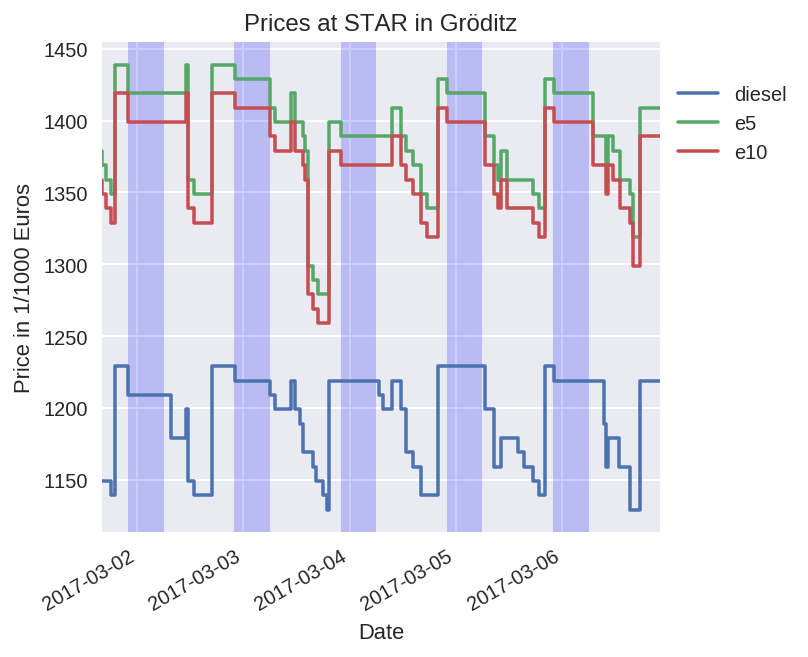

In [89]:
plot_prices(gasstations[:1]["id"].max())

In [90]:
gasstations[gasstations["street"] == "Josephspitalstrasse"]

,id,version,version_time,name,brand,street,house_number,post_code,place,public_holiday_identifier,lat,lng,updated,updated2,open_ts
13569,f96b0d2b-c33b-4d8e-a08b-6a9e2f3c657a,10,2016-05-10 14:01:34,MUENCHEN - JOSEPHSPITALSTR. 12,Agip,Josephspitalstrasse,12,80331,Muenchen,deBY,48.136641,11.56622,2017-03-07 02:16:31+00:00,2017-03-06 22:04:31+00:00,1


1 rows affected.
2863 rows affected.


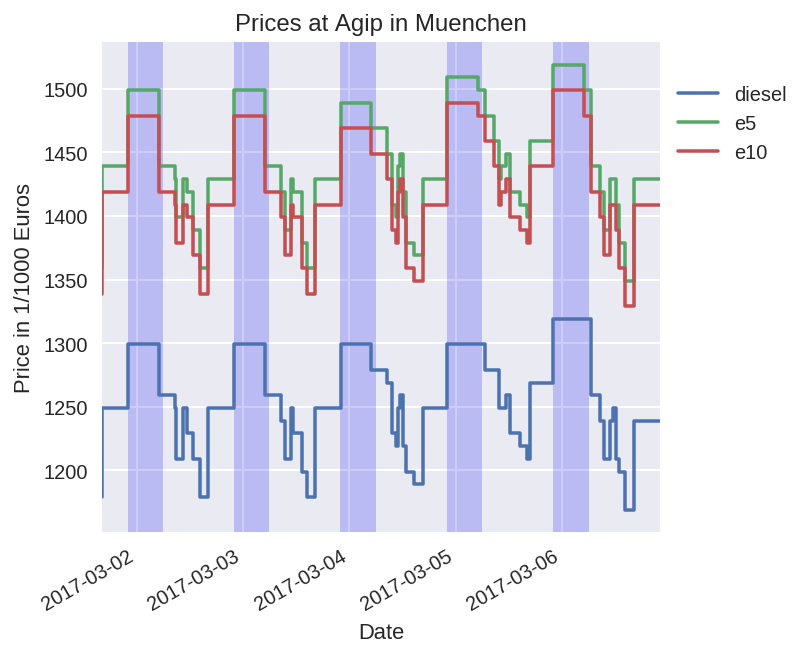

In [91]:
plot_prices("f96b0d2b-c33b-4d8e-a08b-6a9e2f3c657a")

152 rows affected.
7723 rows affected.


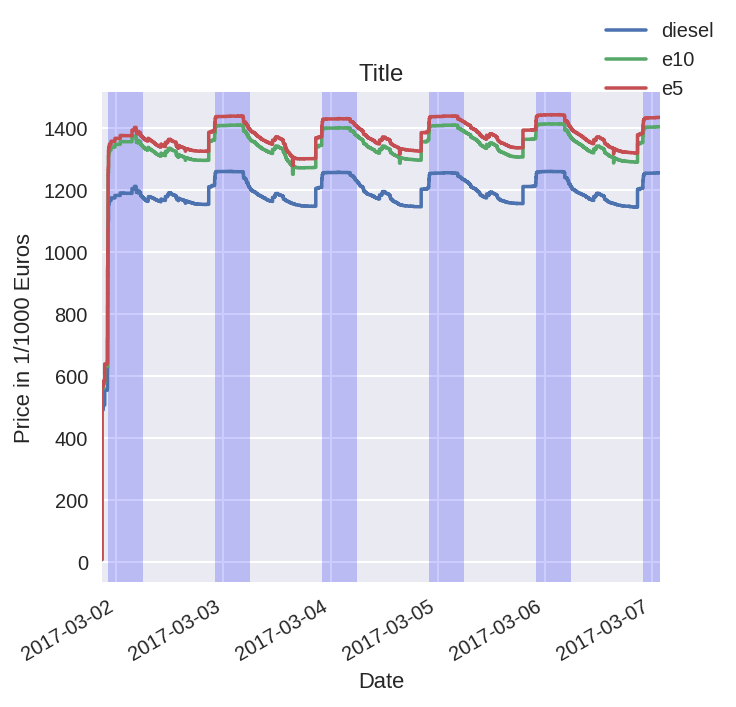

In [151]:
def plot_city(city, start=datetime.now() - timedelta(days=9), end=datetime.now(), title="Title"):
    #find information about the gas stations at the database
    station_information = %sql SELECT * FROM gas_station WHERE place = '$city'
    stations = station_information.DataFrame()
    id_string = ", ".join(map(lambda id: "'%s'" % str(id), stations["id"]))
    
    #find price history of that gas stations
    history_information = %sql SELECT stid, date, diesel, e5, e10 FROM gas_station_information_history WHERE stid IN ($id_string) AND TIMESTAMP '$start' <= date AND date <= TIMESTAMP '$end' ORDER BY date ASC
    history_df = history_information.DataFrame()
    history = history_df[(history_df["date"] >= start) & (history_df["date"] <= end)]#.set_index("stid", "date")
    
    #fix me: initial values
    current_prices = pd.DataFrame(
        [{"stid": stid, "diesel": .0, "e5": .0, "e10": .0} for stid in stations["id"]]
    ).set_index("stid")

    #save mean prices
    mean_prices = pd.DataFrame({
        "date": pd.Series(dtype="datetime64[ns]"),
        "diesel": pd.Series(dtype="float64"),
        "e5": pd.Series(dtype="float64"),
        "e10": pd.Series(dtype="float64")
    }).set_index("date")

    #read price changes
    for idx, change in history.iterrows():
        for fuel_type in ["diesel", "e5", "e10"]:
            current_prices.loc[change["stid"]][fuel_type] = change[fuel_type]
            mean_prices.loc[change["date"]] = current_prices.mean().set_value("date", change["date"])

    #create the plot
    ax = mean_prices.plot(drawstyle="steps", title=title)
    ax.set_ylabel("Price in 1/1000 Euros")
    ax.set_xlabel("Date")

    #highlight nighttimes
    mindate = history["date"].min()
    startdate = datetime(mindate.year, mindate.month, mindate.day) - timedelta(days=1)
    maxdate = history["date"].max()
    enddate = datetime(maxdate.year, maxdate.month, maxdate.day) + timedelta(days=1)
    while startdate < enddate:
        ax.axvspan(startdate + timedelta(hours=nightstart), startdate + timedelta(hours=24 + nightend), facecolor='b', alpha=0.2)
        startdate += timedelta(days=1)
    ax.legend(bbox_to_anchor=(1., .95))
    
plot_city("Berlin")